In [1]:

import numpy as np
import pandas as pd


# Data Reading

Data is in json format; so it's better to convert it to a Pandas data frame format.

In [2]:
import json

with open('/content/intents (1).json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])
df

,tag,patterns,responses,response
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...,NaN
1,morning,[Good morning],[Good morning. I hope you had a good night's s...,NaN
2,afternoon,[Good afternoon],[Good afternoon. How is your day going?],NaN
3,evening,[Good evening],[Good evening. How has your day been?],NaN
4,night,[Good night],"[Good night. Get some proper sleep, Good night...",NaN
...,...,...,...,...
78,fact-31,[What's the difference between anxiety and str...,[Stress and anxiety are often used interchange...,NaN
79,fact-32,[What's the difference between sadness and dep...,"[Sadness is a normal reaction to a loss, disap...",NaN
80,anixety disorder,"[I have anixety disorder, I suffer from adult ...",[ Maybe if you started to address questions of...,NaN
81,worthless,"[i am feeling worthless,i feel like nothing]","[If everyone thinks you're worthless, then may...",NaN


In [3]:
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)

df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,greeting,Hi,[Hello there. Tell me how are you feeling toda...
1,greeting,Hey,[Hello there. Tell me how are you feeling toda...
2,greeting,Is anyone there?,[Hello there. Tell me how are you feeling toda...
3,greeting,Hi there,[Hello there. Tell me how are you feeling toda...
4,greeting,Hello,[Hello there. Tell me how are you feeling toda...
...,...,...,...
233,anixety disorder,I suffer from adult ADHD,[ Maybe if you started to address questions of...
234,worthless,"i am feeling worthless,i feel like nothing","[If everyone thinks you're worthless, then may..."
235,abuse,i am abused,NaN
236,abuse,i have a history abused,NaN


In [4]:
df['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'no-response', 'neutral-response', 'about', 'skill',
       'creation', 'name', 'help', 'sad', 'stressed', 'worthless',
       'depressed', 'happy', 'casual', 'anxious', 'not-talking', 'sleep',
       'scared', 'death', 'understand', 'done', 'suicide', 'hate-you',
       'hate-me', 'default', 'jokes', 'repeat', 'wrong', 'stupid',
       'location', 'something-else', 'friends', 'ask', 'problem',
       'no-approach', 'learn-more', 'user-agree', 'meditation',
       'user-meditation', 'pandora-useful', 'user-advice',
       'learn-mental-health', 'mental-health-fact', 'fact-1', 'fact-2',
       'fact-3', 'fact-5', 'fact-6', 'fact-7', 'fact-8', 'fact-9',
       'fact-10', 'fact-11', 'fact-12', 'fact-13', 'fact-14', 'fact-15',
       'fact-16', 'fact-17', 'fact-18', 'fact-19', 'fact-20', 'fact-21',
       'fact-22', 'fact-23', 'fact-24', 'fact-25', 'fact-26', 'fact-27',
       'fact-28', 'fact-29', '

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(df['patterns'])
tokenizer.get_config()

{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 238,
 'word_counts': '{"hi": 2, "hey": 2, "is": 13, "anyone": 2, "there": 5, "hello": 1, "howdy": 1, "hola": 1, "bonjour": 1, "konnichiwa": 1, "guten": 1, "tag": 1, "ola": 1, "good": 5, "morning": 1, "afternoon": 1, "evening": 1, "night": 1, "bye": 3, "see": 2, "you": 38, "later": 1, "goodbye": 1, "au": 1, "revoir": 1, "sayonara": 1, "ok": 4, "then": 1, "fare": 1, "thee": 1, "well": 2, "thanks": 2, "thank": 3, "that\'s": 3, "helpful": 1, "for": 10, "the": 10, "help": 6, "than": 1, "very": 3, "much": 4, "nothing": 4, "who": 6, "are": 15, "what": 29, "tell": 6, "me": 19, "more": 6, "about": 20, "yourself": 3, "your": 3, "name": 4, "should": 3, "i": 102, "call": 1, "what\'s": 3, "can": 16, "do": 14, "created": 2, "how": 8, "were": 2, "made": 1, "my": 13, "am": 19, "go": 4, "by": 1, "could": 2, "give": 1, "a": 14, "hand": 1, "pl

In [6]:
vacab_size = len(tokenizer.word_index)
print('number of unique words = ', vacab_size)

number of unique words =  311


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Assuming df is a pandas DataFrame containing 'patterns' and 'tag' columns

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['patterns'])
ptrn2seq = tokenizer.texts_to_sequences(df['patterns'])

# Padding Sequences
X = pad_sequences(ptrn2seq, padding='post')

# Label Encoding
lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(df['tag'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes and unique classes
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('num of classes:', len(np.unique(y_train)))


X_train shape: (190, 18)
X_test shape: (48, 18)
num of classes: 74


# Build and Train Model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 100)           31200     
                                                                 
 lstm (LSTM)                 (None, 18, 32)            17024     
                                                                 
 layer_normalization (Layer  (None, 18, 32)            64        
 Normalization)                                                  
                                                                 
 lstm_1 (LSTM)               (None, 18, 32)            8320      
                                                                 
 layer_normalization_1 (Lay  (None, 18, 32)            64        
 erNormalization)                                                
                                                                 
 lstm_2 (LSTM)               (None, 32)                8

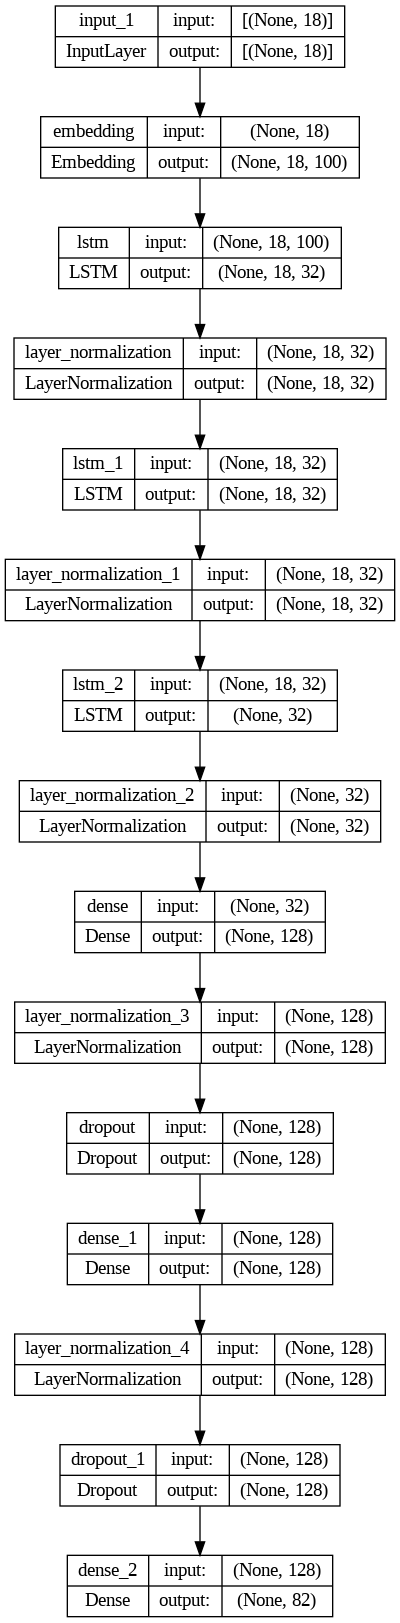

In [8]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, LayerNormalization, Dense, Dropout
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Input(shape=(X.shape[1])))
model.add(Embedding(input_dim=vacab_size+1, output_dim=100, mask_zero=True))
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32))
model.add(LayerNormalization())
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y)), activation="softmax"))
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True)

In [9]:
model_history = model.fit(x=X,
                          y=y,
                          batch_size=10,
                          callbacks=[tensorflow.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)],
                          epochs=50)

Epoch 1/50
24/24 [==============================] - 15s 34ms/step - loss: 4.8265 - accuracy: 0.0294
Epoch 2/50
24/24 [==============================] - 1s 35ms/step - loss: 3.7239 - accuracy: 0.1261
Epoch 3/50
24/24 [==============================] - 1s 35ms/step - loss: 3.1127 - accuracy: 0.2437
Epoch 4/50
24/24 [==============================] - 1s 35ms/step - loss: 2.6071 - accuracy: 0.3739
Epoch 5/50
24/24 [==============================] - 1s 35ms/step - loss: 2.0946 - accuracy: 0.4958
Epoch 6/50
24/24 [==============================] - 1s 35ms/step - loss: 1.8383 - accuracy: 0.5882
Epoch 7/50
24/24 [==============================] - 1s 54ms/step - loss: 1.5163 - accuracy: 0.6597
Epoch 8/50
24/24 [==============================] - 1s 58ms/step - loss: 1.2997 - accuracy: 0.6807
Epoch 9/50
24/24 [==============================] - 1s 42ms/step - loss: 1.0435 - accuracy: 0.7689
Epoch 10/50
24/24 [==============================] - 1s 34ms/step - loss: 0.8594 - accuracy: 0.8319
Epoch 11

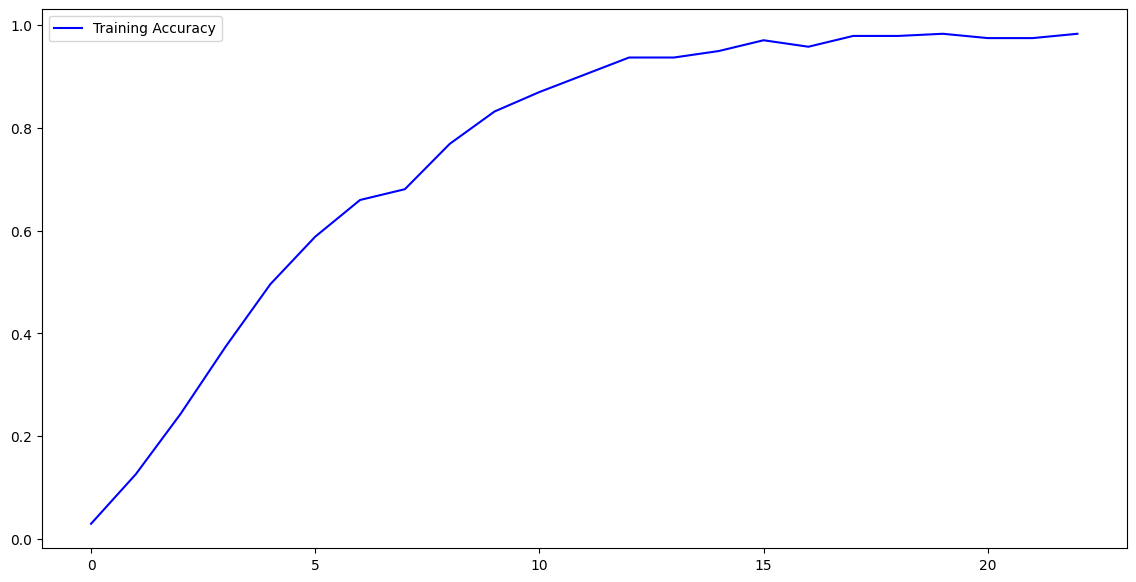

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
acc = model_history.history['accuracy']

epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'b',label="Training Accuracy")

plt.legend(loc='upper left')
plt.show()


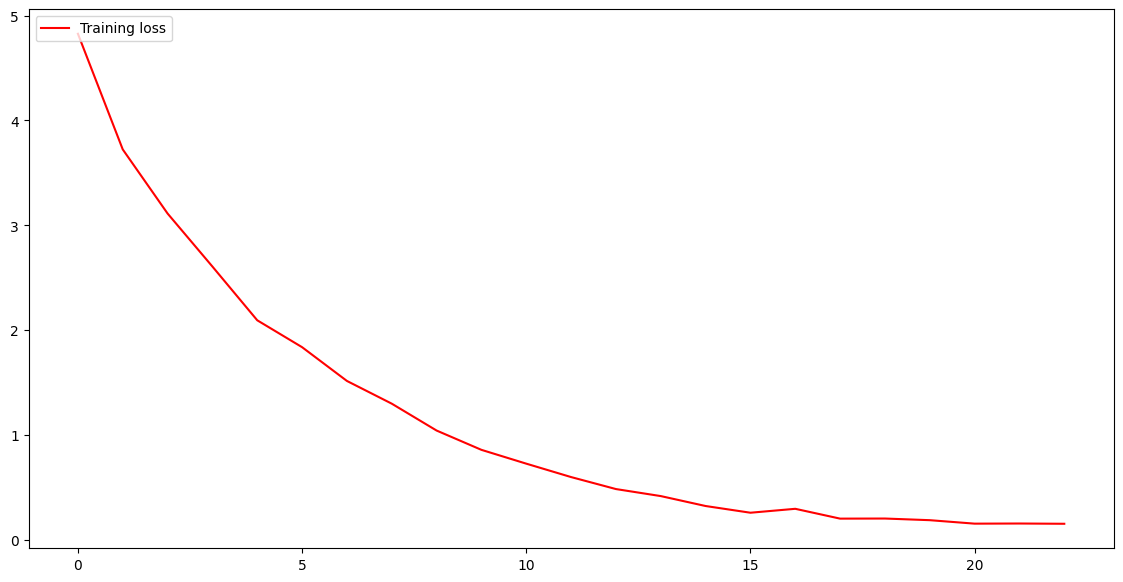

In [11]:
loss = model_history.history['loss']

epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")

plt.legend(loc='upper left')
plt.show()

2/2 [==============================] - 4s 14ms/step


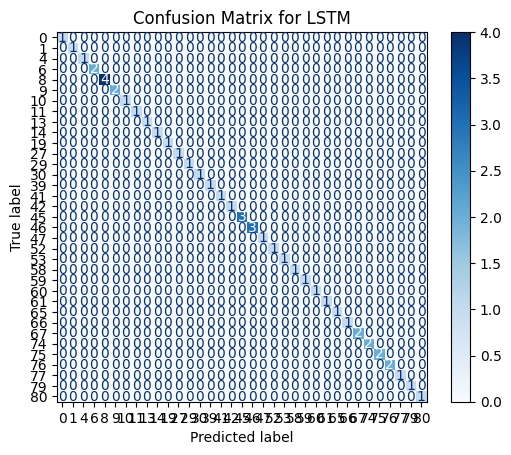

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_true, model_name):
    # Predicting labels
    y_pred = np.argmax(model.predict(X_test), axis=-1)
    # Generating confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Displaying confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plot confusion matrix for LSTM model
plot_confusion_matrix(model, X_test, y_test, 'LSTM')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 18, 100)           31300     
                                                                 
 conv1d (Conv1D)             (None, 14, 128)           64128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 82)                10578     
                                                      

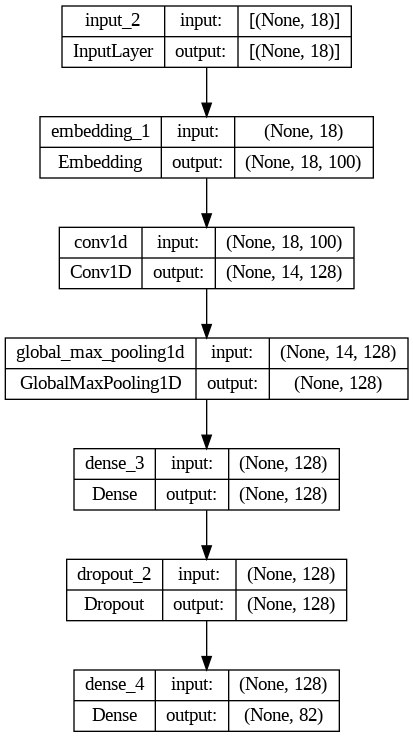

In [13]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
vocab_size = len(np.unique(X))
model2 = Sequential()
model2.add(Input(shape=(X.shape[1])))
model2.add(Embedding(input_dim=vocab_size+1, output_dim=100, mask_zero=True))
model2.add(Conv1D(128, 5, activation='relu'))
model2.add(GlobalMaxPooling1D())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(len(np.unique(y)), activation='softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model2.summary()
plot_model(model2, show_shapes=True)


In [14]:
model_history = model2.fit(x=X,
                          y=y,
                          batch_size=10,
                          callbacks=[tensorflow.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)],
                          epochs=50)

Epoch 1/50
24/24 [==============================] - 1s 5ms/step - loss: 4.3883 - accuracy: 0.0462
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 4.2654 - accuracy: 0.0504
Epoch 3/50
24/24 [==============================] - 0s 5ms/step - loss: 4.1135 - accuracy: 0.0546
Epoch 4/50
24/24 [==============================] - 0s 5ms/step - loss: 3.9650 - accuracy: 0.0714
Epoch 5/50
24/24 [==============================] - 0s 5ms/step - loss: 3.7569 - accuracy: 0.1176
Epoch 6/50
24/24 [==============================] - 0s 5ms/step - loss: 3.4306 - accuracy: 0.2059
Epoch 7/50
24/24 [==============================] - 0s 5ms/step - loss: 3.0780 - accuracy: 0.2521
Epoch 8/50
24/24 [==============================] - 0s 6ms/step - loss: 2.6795 - accuracy: 0.3235
Epoch 9/50
24/24 [==============================] - 0s 8ms/step - loss: 2.2830 - accuracy: 0.4496
Epoch 10/50
24/24 [==============================] - 0s 8ms/step - loss: 1.9000 - accuracy: 0.5630
Epoch 11/50
24/24 [

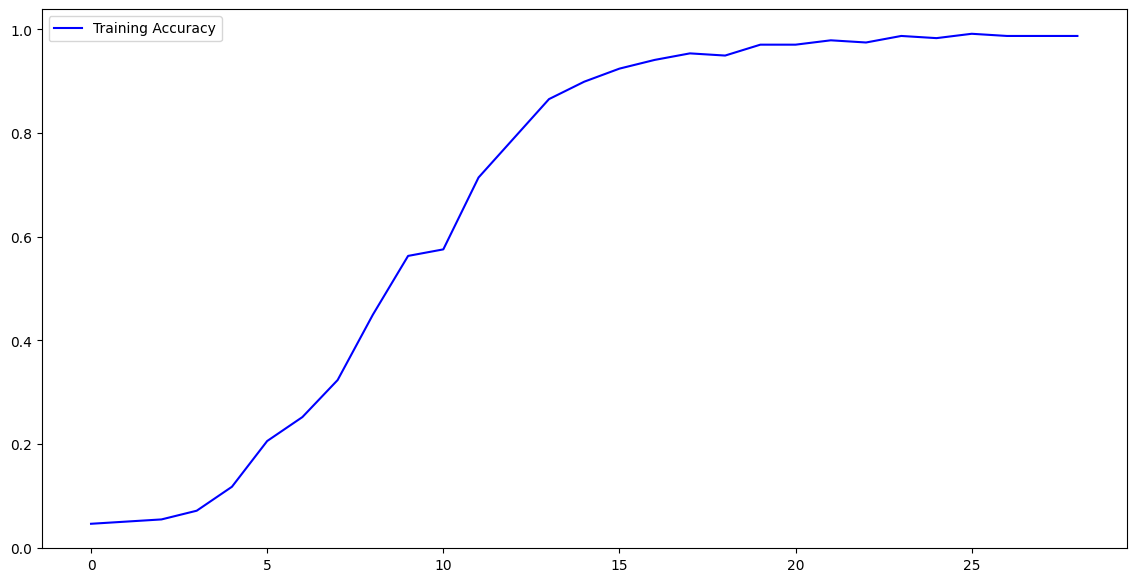

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
acc = model_history.history['accuracy']

epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'b',label="Training Accuracy")

plt.legend(loc='upper left')
plt.show()

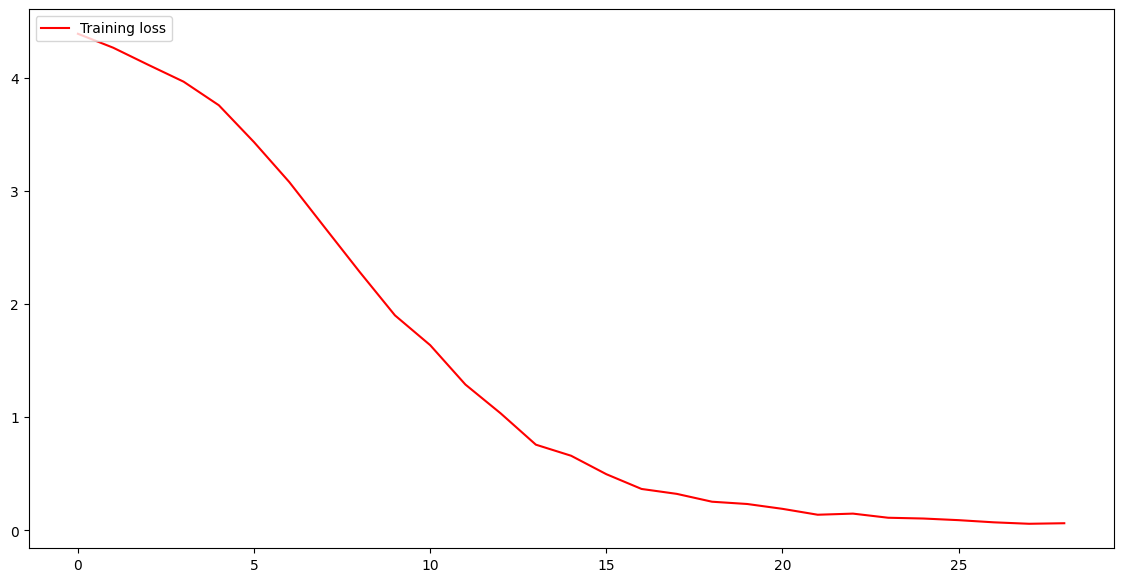

In [16]:
loss = model_history.history['loss']

epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")

plt.legend(loc='upper left')
plt.show()

2/2 [==============================] - 0s 18ms/step


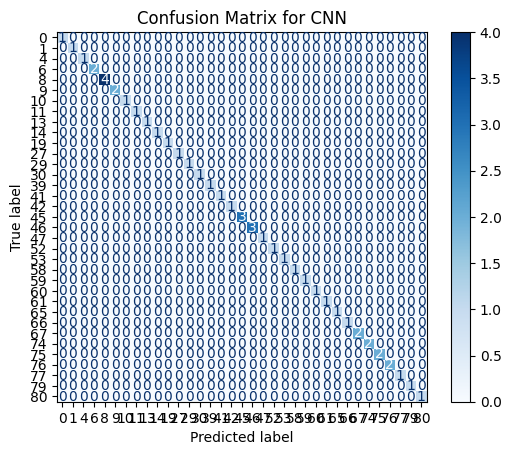

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot confusion matrix
def plot_confusion_matrix(model2, X_test, y_true, model_name):
    # Predicting labels
    y_pred = np.argmax(model2.predict(X_test), axis=-1)
    # Generating confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Displaying confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plot confusion matrix for LSTM model
plot_confusion_matrix(model, X_test, y_test, 'CNN')


In [18]:
from sklearn.metrics import classification_report

# Assuming you have trained LSTM and CNN models named lstm_model and cnn_model respectively
# and you have test data X_test and corresponding true labels y_test

# Function to generate classification report
def generate_classification_report(model, X_test, y_test, model_name):
    # Predicting labels
    y_pred = np.argmax(model.predict(X_test), axis=-1)
    # Generating classification report
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {model_name}:\n{report}")

# Generate classification report for LSTM model
generate_classification_report(model, X_test, y_test, 'LSTM')




2/2 [==============================] - 0s 13ms/step
Classification Report for LSTM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         1
          27       1.00      1.00      1.00         1
          29       1.00      1.00      1.00         1
          30       1.00      1.00      1.00         1
          39       1.00      1.00      1.00         1
          41       1.00      1.00      1.00        

In [19]:
from sklearn.metrics import classification_report

# Assuming you have trained LSTM and CNN models named lstm_model and cnn_model respectively
# and you have test data X_test and corresponding true labels y_test

# Function to generate classification report
def generate_classification_report(model, X_test, y_test, model_name):
    # Predicting labels
    y_pred = np.argmax(model.predict(X_test), axis=-1)
    # Generating classification report
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {model_name}:\n{report}")

# Generate classification report for LSTM model
generate_classification_report(model, X_test, y_test, 'CNN')

2/2 [==============================] - 0s 13ms/step
Classification Report for CNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         1
          27       1.00      1.00      1.00         1
          29       1.00      1.00      1.00         1
          30       1.00      1.00      1.00         1
          39       1.00      1.00      1.00         1
          41       1.00      1.00      1.00         

# Model Testing

First we should apply some text preprocessing on the pattern that is passed to the function. Next we convert the text to vector of numbers and give it to model for prediction its tag; Finally based on the tag, we choose a answer(response) randomly and return it.

In [20]:
!pip install tensorflow
!pip install keras
!pip install numpy


In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [22]:
import re
import random

def generate_answer(pattern):
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', pattern)
    txt = txt.lower()
    txt = txt.split()
    txt = " ".join(txt)
    text.append(txt)

    x_test = tokenizer.texts_to_sequences(text)
    x_test = np.array(x_test).squeeze()
    x_test = pad_sequences([x_test], padding='post', maxlen=X.shape[1])
    y_pred = model.predict(x_test)
    y_pred = y_pred.argmax()
    tag = lbl_enc.inverse_transform([y_pred])[0]
    responses = df[df['tag'] == tag]['responses'].values[0]
    you = format(pattern)
    print("you: ",you)
    modal = format(random.choice(responses))
    print("model: ",modal)


In [23]:
generate_answer('Hi! How are you?')

1/1 [==============================] - 0s 37ms/step
you:  Hi! How are you?
model:  I was trained on a text dataset using Deep Learning & Natural Language Processing techniques


In [24]:
generate_answer('Well... I\'m feeling depressed')

1/1 [==============================] - 0s 35ms/step
you:  Well... I'm feeling depressed
model:  I see. What else?


In [25]:
generate_answer('Maybe I just didn\'t want to be born :)')

1/1 [==============================] - 0s 40ms/step
you:  Maybe I just didn't want to be born :)
model:  I'm very sorry to hear that but you have so much to look forward to. Please seek help by contacting: 9152987821.


In [26]:
def generate_answer(pattern):
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', pattern)
    txt = txt.lower()
    txt = txt.split()
    txt = " ".join(txt)
    text.append(txt)

    x_test = tokenizer.texts_to_sequences(text)
    x_test = np.array(x_test).squeeze()
    x_test = pad_sequences([x_test], padding='post', maxlen=X.shape[1])
    y_pred = model.predict(x_test)
    y_pred = y_pred.argmax()

    try:
        tag = lbl_enc.inverse_transform([y_pred])[0]
        responses = df[df['tag'] == tag]['responses'].values[0]
        return random.choice(responses)
    except:
        return "I'm sorry, I didn't understand that. Can you please rephrase or try a different question?"


# Conversation loop
while True:
    user_input = input("You: ")
    if user_input.lower() == 'exit':
        print("Chatbot: Goodbye!")
        break
    modal_variable = generate_answer(user_input)
    print("Chatbot:", modal_variable)


You: Good morning
1/1 [==============================] - 0s 23ms/step
Chatbot: Good morning. I hope you had a good night's sleep. How are you feeling today? 
You: I feel much better today
1/1 [==============================] - 0s 23ms/step
Chatbot: Your welcome. Remember: Always focus on what's within your control. When you find yourself worrying, take a minute to examine the things you have control over. You can't prevent a storm from coming but you can prepare for it. You can't control how someone else behaves, but you can control how you react. Recognize that sometimes, all you can control is your effort and your attitude. When you put your energy into the things you can control, you'll be much more effective.
You: Thank you
1/1 [==============================] - 0s 26ms/step
Chatbot: You're most welcome!
You: exit
Chatbot: Goodbye!


In [27]:
generate_answer('i have been lonely for very long days')

1/1 [==============================] - 0s 27ms/step


'How long have you been feeling this way?'

In [28]:
generate_answer('Hi! How are you?')

1/1 [==============================] - 0s 24ms/step


'The real question is: Who created you?'

In [29]:
generate_answer('Well... I\'m feeling depressed')

1/1 [==============================] - 0s 24ms/step


"I'm listening. Tell me more."

In [30]:
import re
import random

def generate_answer(pattern):
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', pattern)
    txt = txt.lower()
    txt = txt.split()
    txt = " ".join(txt)
    text.append(txt)

    x_test = tokenizer.texts_to_sequences(text)
    x_test = np.array(x_test).squeeze()
    x_test = pad_sequences([x_test], padding='post', maxlen=X.shape[1])
    y_pred = model.predict(x_test)
    y_pred = y_pred.argmax()
    tag = lbl_enc.inverse_transform([y_pred])[0]
    responses = df[df['tag'] == tag]['responses'].values[0]
    you = format(pattern)
    print("you: ",you)
    modal = format(random.choice(responses))
    print("model: ",modal)

In [31]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 10.9 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl si

In [32]:
import gradio as gr
import re
import random

def generate_answer(user_message):
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', user_message)
    txt = txt.lower()
    txt = txt.split()
    txt = " ".join(txt)
    text.append(txt)

    x_test = tokenizer.texts_to_sequences(text)
    x_test = np.array(x_test).squeeze()
    x_test = pad_sequences([x_test], padding='post', maxlen=X.shape[1])
    y_pred = model.predict(x_test)
    y_pred = y_pred.argmax()
    tag = lbl_enc.inverse_transform([y_pred])[0]
    responses = df[df['tag'] == tag]['responses'].values[0]
    you = format(user_message)
    modal = format(random.choice(responses))
    bot_response = modal

    return bot_response
# Create Gradio Interface
user_message_input = gr.Textbox(lines=7, label="User Message", placeholder="Type your message here...")
bot_response_output = gr.Textbox(lines=7, label="Bot Response")

gr.Interface(fn=generate_answer, inputs=user_message_input, outputs=bot_response_output,
             title="Mental Health Chatbot", description="Type your message to chat with the bot.").launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://844aaff1344a673ede.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
